## 1. importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


## 2. importing datasets - updated with merged customer data

In [3]:
# seting up folder path

path = '/Users/martamajer/Desktop/Desktop - Marta’s MacBook Air - 1/09-2024 Instacart Basket Analysis/'

# importing datasets

ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

## 3. creating charts

### • bar chart for categorical data (day of the week)

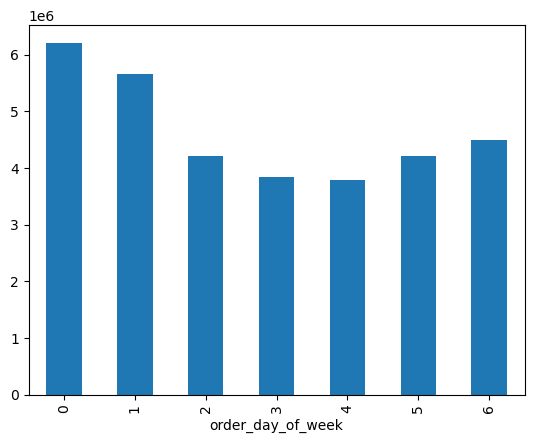

In [61]:
# including sort_index function orders the number ascending; it can be used also by simply printing frequencies 
# experiment with colours, follow the design guidances - plot.bar(color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
# bar_figure calls this bar 

bar = ords_prods_customers['order_day_of_week'].value_counts().sort_index().plot.bar()

In [62]:
# exporting the bar 

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### • histogram for continuous data

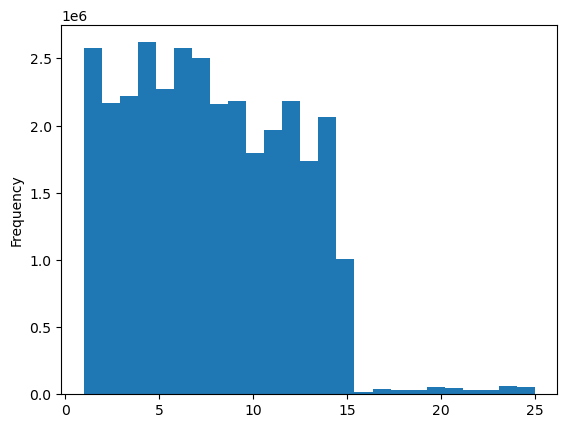

In [44]:
# creating histogram, continuous numerical values and their density, buckets' range is 25 

hist_o = ords_prods_customers['prices'].plot.hist(bins = 25)

### insights:

I noticed values of 99,999 and 14,900 for the milk product in the previous exercise, where I was checking the minimum and maximum values of order. Those prices (outliers, mostly errors) are the reason why the graph appears this way.

In [59]:
# exporting the graph 

hist_o.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_o.png'))

### • scatterplot

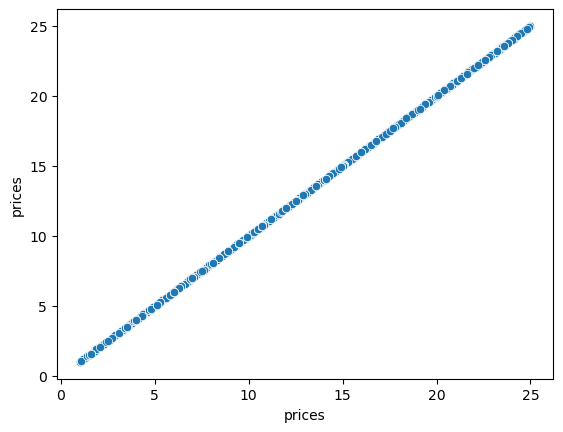

In [49]:
# I already turned the outliers into NaN values and I lost the previous graph 

import seaborn as sns
import matplotlib.pyplot as plt

# Your scatterplot code
scatterplot = sns.scatterplot(x='prices', y='prices', data=ords_prods_customers)

# Add this to display the plot
plt.show()

#### insights: 

Outliers 14900USD and 99999USD addressed above and checked in the last Exercise.

In [4]:
# turning those two big outliers into missing values

ords_prods_customers.loc[ords_prods_customers['prices'] >100, 'prices'] = np.nan

In [5]:
# checking if these were removed by checking if we have higher values than 100

ords_prods_customers.loc[ords_prods_customers['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,n_dependants,fam_status,income,_merge


In [6]:
ords_prods_customers['prices'].max()

25.0

#### QA went smoothly.
no values above 25 usd. 

### histogram, again, to check the price distribution now 

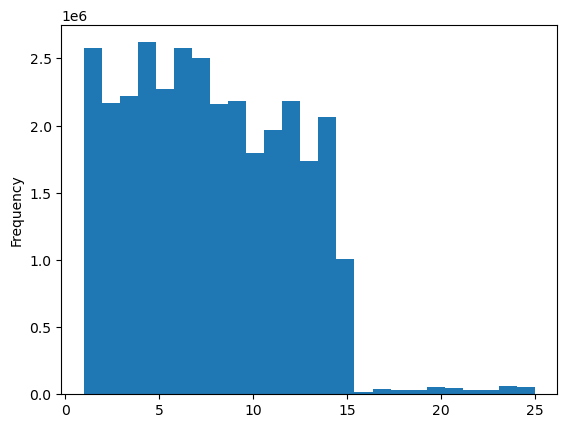

In [10]:
hist = ords_prods_customers['prices'].plot.hist(bins=25)

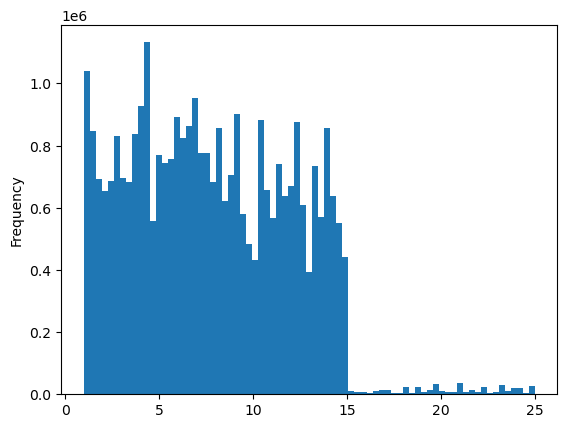

In [63]:
# Increasing the number of bins will allow you to see more variety in your histogram.

hist_2 = ords_prods_customers['prices'].plot.hist(bins=75)

In [64]:
# exporting the histogram 

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_buckets.png'))

## 4. sampling data

In [13]:
# Set the seed for the random number generator
np.random.seed(4)

# create a list holding true/false values to the test np.random.rant() <= 0.7 (32,404,859 random numbers)
dev = np.random.rand(len(ords_prods_customers)) <= 0.7

#### what's above? 
1. This ensures that the random numbers generated by np.random.rand() will be the same each time the code is run, as the seed value (4) initializes the random number generator to produce a reproducible sequence of random numbers.

2. Here, np.random.rand(len(ords_prods_flags)) generates a list of random numbers (between 0 and 1) with the same length as ords_prods_flags. If len(ords_prods_flags) is 32,404,859, then exactly 32,404,859 random numbers are generated. Each generated random number is compared to 0.7. This creates a boolean array where each element is True if the corresponding random number is less than or equal to 0.7, and False if it’s greater than 0.7.

In [14]:
np.random.rand()

0.1689183484910045

#### what is np.random.rand()

The function np.random.rand() from NumPy generates an array of random numbers, all between 0 and 1, drawn from a uniform distribution.

In [15]:
# created list holding true/false values to the test np.random.rant() <= 0.7

dev

array([False,  True, False, ..., False,  True,  True])

#### what is dev? 

In the code you provided, dev is a boolean array
(a list of True and False values) that is created based on a condition applied to random numbers generated by

### sampling recap!

So, to recap each piece of the split code, you need to:

• Set the seed for the random number generator.

• Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

• Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

• Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [16]:
# store 70% of the sample in the dataframe big 

big = ords_prods_customers[dev]

In [17]:
# store 30% of the sample in the dataframe small 

small = ords_prods_customers[~dev]

#### how it works?

For every value in the list that’s True, the corresponding row in your ords_prods_flags dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample.

In [18]:
# checking up the lenght of orignal df

len(ords_prods_customers)

32434212

In [19]:
# checking up if both small and big sample adds up to the full df length

len(big) + len(small)

32434212

In [65]:
# speed up the processing time - reduce to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.

df_2 = small[['order_day_of_week','prices']]

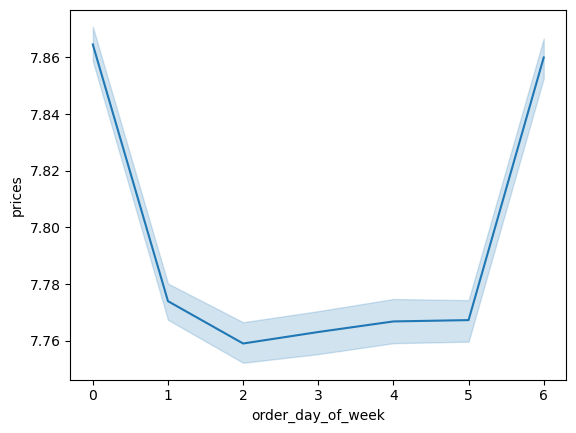

In [66]:
# creating line chart from the 30% split and chosen two columns in df_2 

line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [68]:
# exporting the graph 

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_order_dow.png'))

### line chart description:

The blue line, then, represents how prices differ depending on the day of the week. The peaks on days zero and six mean that most money is spent on Friday and Saturday. This might be due to people stocking up on things before the weekend.

You may be wondering what those translucent blue bands are around your line. Those are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

## 5. creating a histogram to see which hour of the day has the most orders.

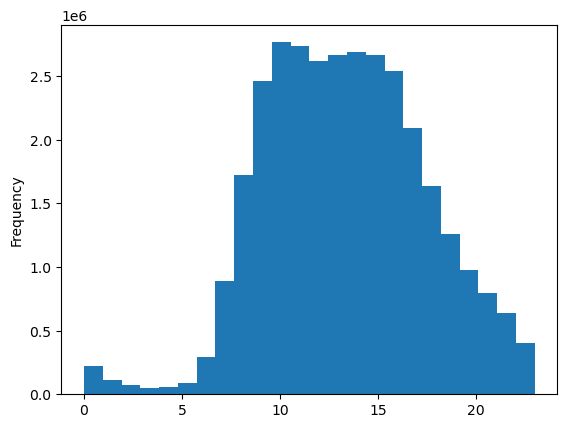

In [22]:
# Increasing the number of bins will allow you to see more variety in your histogram.

hist_hour = ords_prods_customers['order_hour_of_day'].plot.hist(bins=24)

### insight:

The histogram illustrates the distribution of orders throughout the day, with the highest value at 10 AM followed by 11AM. Most orders occur between 9 AM and 5 PM (17:00), indicating this as the busiest period. In contrast, very few orders are placed between midnight and 6 AM.

In [69]:
# exporting the graph 

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour.png'))

## 6. creating a bar chart to see distribution of orders among customers in terms of loyalty

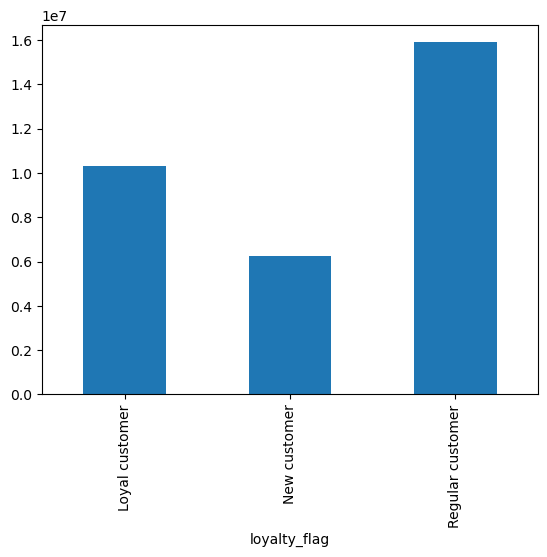

In [74]:
bar_2 = ords_prods_customers['loyalty_flag'].value_counts().sort_index().plot.bar()

In [77]:
# Adjust layout and figure size if needed
bar_2.figure.set_size_inches(10, 6)  # Adjust the width and height as needed
plt.tight_layout()  # Automatically adjust layout

# Save the figure using the correct reference
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bars.png'), bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

### Insight:

The largest group consists of regular customers, placing between 11 and 40 orders. The loyal customer group, with more than 40 orders, is steadily catching up with the regulars. The smallest group comprises new customers, who have placed 10 or fewer orders.

This aligns with the previously printed frequency table, which shows the following counts:

Regular customers: 15,891,077
Loyal customers: 10,293,737
New customers: 6,249,398

## 7. creating a line chart to check a difference in expenditure depending on the hour of the day

In [24]:
# we are taking the small df that was sampled beforehand 

# speed up the processing time - reduce to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.

df_3 = small[['order_hour_of_day','prices']]

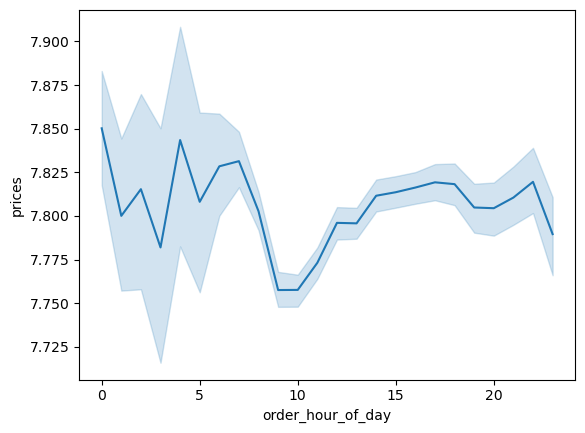

In [25]:
# creating line chart from the 30% split and chosen two columns in df_3 

line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

### insights:

TL;DR 
There’s no dramatic change in prices throughout the day. Most prices hover around 7.80, with slight fluctuations.

FULL
The error bands (the shaded area) are wider during the early morning hours (midnight to around 6 AM). This suggests more variability in the prices for orders placed during these hours. After this, the error bands narrow during the day (from around 7 AM to 10 PM), indicating more consistency in pricing during these hours.

The wide error bands likely mean there are fewer data points (orders) during these early hours, leading to greater variability in the average price. This makes the confidence interval larger because it's harder to get an accurate average with a smaller sample.

Since the prices themselves don't fluctuate a lot (only a small range between 7.725 and 7.900), the error bands might look wide relative to the minimal changes in average price. But in reality, it could just mean that there’s more variability or fewer data points in the early hours.

In [71]:
# exporting the graph 

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_order_hod.png'))

## 8. creating a line chart to show the relationship between age and number of dependents

In [27]:
df_3 = small[['n_dependants','age']]

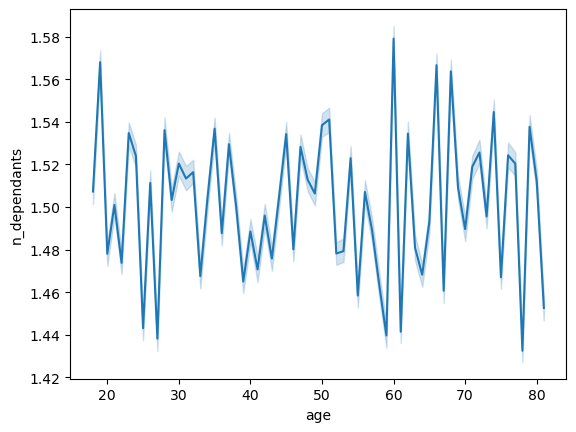

In [50]:
line_3 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

In [72]:
# exporting the graph 

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants.png'))

### Insights:

The graph above shows the relationship between age and n_dependants, with values fluctuating between 1.42 and 1.58. There’s no clear trend, and the number of dependants appears to vary randomly across age groups. This suggests that age is not a strong predictor of the number of dependants, with high variability within each age range.

As observed below , each age group has a similar distribution of 0, 1, 2, and 3 dependants, leading the graph to oscillate around an average of 1.5 dependants across all ages.

In [42]:
import pandas as pd

# Temporarily set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full grouped table
print(ords_prods_customers.groupby('age')['n_dependants'].value_counts().unstack().fillna(0))

# Reset display options if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

n_dependants       0       1       2       3
age                                         
18            125413  127944  115686  131829
19            110849  137969  135651  135714
20            125886  132430  123430  121563
21            123091  132275  133718  123893
22            134311  131109  120416  128573
23            127311  122723  125891  139209
24            117457  138450  123982  129505
25            134160  108805  116005  113761
26            121905  128319  140842  122218
27            149484  123052  124409  127898
28            110595  129520  124275  123895
29            134276  122144  130570  133693
30            131187  116990  125868  135351
31            135506  120820  137704  134951
32            118461  126848  132794  120194
33            129372  125328  120192  120064
34            129716  120838  128237  128972
35            119370  129183  142797  127899
36            120798  122678  123988  116761
37            119289  134900  123922  132844
38        

## 9. creating a line chart to show the relationship between age and spending power (income)

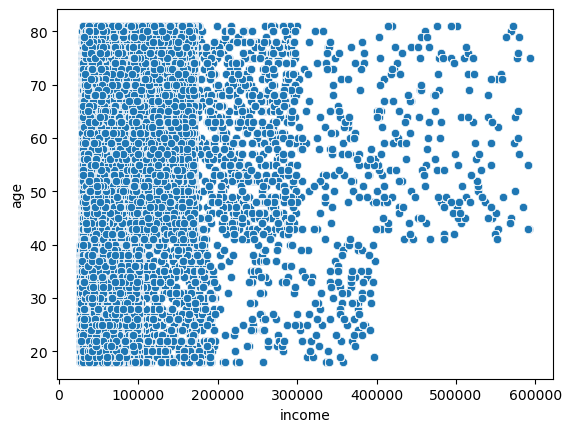

In [55]:
# Your scatterplot code
scatterplot_2 = sns.scatterplot(x='income', y='age', data=ords_prods_customers)

# Add this to display the plot
plt.show()

In [73]:
# exporting the graph 

scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))

### Insights:

The scatterplot shows that individuals begin earning more than 40k per year only after reaching the age of 40, and this trend holds consistently for the entire 40-80 age group. Before 40, no one appears to earn more than 40k, indicating a distinct gap in income distribution. Despite this, the overall income distribution is quite dense, making it difficult to discern any clear trends besides the age threshold for higher earnings.

## 10. exporting updated df to pickle format

In [7]:
# exporting data to pkl format

ords_prods_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_final.pkl'))